In [1]:
# Пример ноутбука

In [2]:
import pandas as pd

In [3]:
import sklearn; sklearn.show_versions()


System:
    python: 3.12.4 | packaged by Anaconda, Inc. | (main, Jun 18 2024, 15:03:56) [MSC v.1929 64 bit (AMD64)]
executable: d:\programm_files\anaconda\python.exe
   machine: Windows-11-10.0.22631-SP0

Python dependencies:
      sklearn: 1.4.2
          pip: 24.0
   setuptools: 69.5.1
        numpy: 1.26.4
        scipy: 1.12.0
       Cython: None
       pandas: 2.2.2
   matplotlib: 3.8.4
       joblib: 1.4.2
threadpoolctl: 2.2.0

Built with OpenMP: True

threadpoolctl info:
       filepath: D:\programm_files\anaconda\Library\bin\mkl_rt.2.dll
         prefix: mkl_rt
       user_api: blas
   internal_api: mkl
        version: 2023.1-Product
    num_threads: 6
threading_layer: intel

       filepath: D:\programm_files\anaconda\vcomp140.dll
         prefix: vcomp
       user_api: openmp
   internal_api: openmp
        version: None
    num_threads: 12


In [4]:
from sklearn.linear_model import LogisticRegression

In [5]:
from sklearn.preprocessing import StandardScaler

In [6]:
import matplotlib.pyplot as plt

In [7]:
train = pd.read_csv('data/train.csv', index_col=0)

In [8]:
train

,user_id,ts,gate_id
0,18,2022-07-29 09:08:54,7
1,18,2022-07-29 09:09:54,9
2,18,2022-07-29 09:09:54,9
3,18,2022-07-29 09:10:06,5
4,18,2022-07-29 09:10:08,5
...,...,...,...
37513,6,2022-12-31 20:38:56,11
37514,6,2022-12-31 20:39:22,6
37515,6,2022-12-31 20:39:23,6
37516,6,2022-12-31 20:39:31,9


In [9]:
test = pd.read_csv('data/test.csv', index_col=0)

In [10]:
test

,ts,gate_id,user_word
37518,2023-01-03 08:21:00,9,gini
37519,2023-01-03 08:21:00,9,gini
37520,2023-01-03 08:21:18,5,gini
37521,2023-01-03 08:21:19,5,gini
37522,2023-01-03 08:21:39,10,gini
...,...,...,...
44638,2023-02-24 19:43:36,11,collinear
44639,2023-02-24 19:44:00,4,collinear
44640,2023-02-24 19:44:01,4,collinear
44641,2023-02-24 19:44:09,9,collinear


In [11]:
all_data = pd.concat([train, test], axis=0)

In [12]:
all_data

,user_id,ts,gate_id,user_word
0,18.0,2022-07-29 09:08:54,7,NaN
1,18.0,2022-07-29 09:09:54,9,NaN
2,18.0,2022-07-29 09:09:54,9,NaN
3,18.0,2022-07-29 09:10:06,5,NaN
4,18.0,2022-07-29 09:10:08,5,NaN
...,...,...,...,...
44638,NaN,2023-02-24 19:43:36,11,collinear
44639,NaN,2023-02-24 19:44:00,4,collinear
44640,NaN,2023-02-24 19:44:01,4,collinear
44641,NaN,2023-02-24 19:44:09,9,collinear


In [13]:
# Доля тест во всей выборке

sum(all_data['user_word'].notnull()) / all_data['user_word'].shape[0] 

0.1595994892816343

In [14]:
all_data['ts'] = pd.to_datetime(all_data['ts'])

<Axes: >

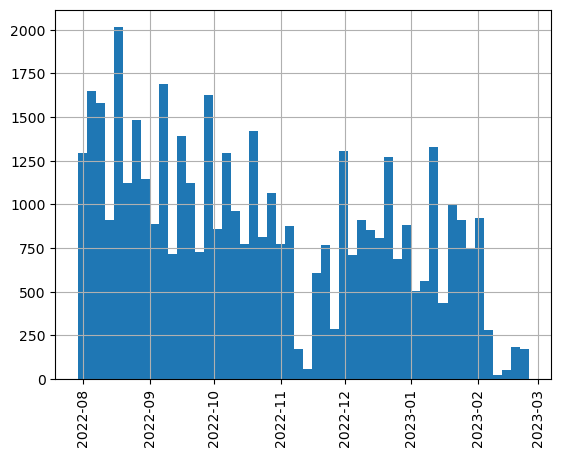

In [15]:
plt.figure()
plt.xticks(rotation='vertical')
all_data['ts'].hist(bins=50)

# Here we continue

In [16]:
train_gate_list = sorted(list(train['gate_id'].unique()))

In [17]:
test_gate_list = sorted(list(test['gate_id'].unique()))

In [18]:
only_test = [gate for gate in test_gate_list if gate not in train_gate_list]

In [19]:
only_train = [gate for gate in train_gate_list if gate not in test_gate_list]

In [20]:
only_test

[2]

In [21]:
only_train

[0, 16]

In [22]:
test[test['gate_id']==2]

,ts,gate_id,user_word
39911,2023-01-13 16:49:52,2,categorical
39912,2023-01-13 16:49:54,2,categorical
39928,2023-01-13 18:21:16,2,categorical
39929,2023-01-13 18:21:19,2,categorical


In [23]:
all_gates = sorted(list(all_data['gate_id'].unique()))
all_gates

[-1, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16]

In [24]:
# Сделаем бинарные переменные для турникетов

gates = pd.get_dummies(all_data['gate_id'])

In [25]:
gates.columns = ['gate_'+str(col) for col in gates.columns]

In [26]:
gates

,gate_-1,gate_0,gate_1,gate_2,gate_3,gate_4,gate_5,gate_6,gate_7,gate_8,gate_9,gate_10,gate_11,gate_12,gate_13,gate_14,gate_15,gate_16
0,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False
3,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44638,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False
44639,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False
44640,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False
44641,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False


In [27]:
# Припишем новые бинарные переменные "турникет" к полной выборке

all_data = pd.concat([all_data, gates], axis=1)

In [28]:
all_data.head(3)

,user_id,ts,gate_id,user_word,gate_-1,gate_0,gate_1,gate_2,gate_3,gate_4,...,gate_7,gate_8,gate_9,gate_10,gate_11,gate_12,gate_13,gate_14,gate_15,gate_16
0,18.0,2022-07-29 09:08:54,7,NaN,False,False,False,False,False,False,...,True,False,False,False,False,False,False,False,False,False
1,18.0,2022-07-29 09:09:54,9,NaN,False,False,False,False,False,False,...,False,False,True,False,False,False,False,False,False,False
2,18.0,2022-07-29 09:09:54,9,NaN,False,False,False,False,False,False,...,False,False,True,False,False,False,False,False,False,False


In [29]:
# Список дней недели

list_dow = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']

In [30]:
# Припишем новые бинарные переменные "день недели" к полной выборке

all_data[list_dow] = pd.get_dummies(all_data['ts'].dt.day_name())[list_dow]

In [31]:
all_data['ts'].dt.day_name().value_counts()

ts
Friday       9498
Thursday     8907
Wednesday    8572
Monday       8294
Tuesday      8196
Saturday      789
Sunday        387
Name: count, dtype: int64

In [88]:
pd.get_dummies(all_data['ts'].dt.day_name())[list_dow]

,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,Sunday
0,False,False,False,False,True,False,False
1,False,False,False,False,True,False,False
2,False,False,False,False,True,False,False
3,False,False,False,False,True,False,False
4,False,False,False,False,True,False,False
...,...,...,...,...,...,...,...
44638,False,False,False,False,True,False,False
44639,False,False,False,False,True,False,False
44640,False,False,False,False,True,False,False
44641,False,False,False,False,True,False,False


In [32]:
# Список переменных вида hour_#

list_hr_num = sorted(list(all_data['ts'].dt.hour.unique()))

list_hours = ['hour_'+str(i) for i in list_hr_num] 

In [33]:
list_hr_num

[0, 1, 3, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23]

In [34]:
# Добавим бинарные переменные для часа

all_data[list_hours] = pd.get_dummies(all_data['ts'].dt.hour)[list_hr_num]

In [35]:
# Припишем переменные мин, час, день, месяц, день недели 
all_data['ts']

0       2022-07-29 09:08:54
1       2022-07-29 09:09:54
2       2022-07-29 09:09:54
3       2022-07-29 09:10:06
4       2022-07-29 09:10:08
                ...        
44638   2023-02-24 19:43:36
44639   2023-02-24 19:44:00
44640   2023-02-24 19:44:01
44641   2023-02-24 19:44:09
44642   2023-02-24 19:44:09
Name: ts, Length: 44643, dtype: datetime64[ns]

In [36]:
all_data['min'] = all_data['ts'].dt.minute

In [37]:
all_data['hour'] = all_data['ts'].dt.hour

In [38]:
all_data['day'] = all_data['ts'].dt.day

In [39]:
all_data['month'] = all_data['ts'].dt.month

In [40]:
all_data['dayofweek'] = all_data['ts'].dt.dayofweek

In [41]:
all_data.columns

Index(['user_id', 'ts', 'gate_id', 'user_word', 'gate_-1', 'gate_0', 'gate_1',
       'gate_2', 'gate_3', 'gate_4', 'gate_5', 'gate_6', 'gate_7', 'gate_8',
       'gate_9', 'gate_10', 'gate_11', 'gate_12', 'gate_13', 'gate_14',
       'gate_15', 'gate_16', 'Monday', 'Tuesday', 'Wednesday', 'Thursday',
       'Friday', 'Saturday', 'Sunday', 'hour_0', 'hour_1', 'hour_3', 'hour_6',
       'hour_7', 'hour_8', 'hour_9', 'hour_10', 'hour_11', 'hour_12',
       'hour_13', 'hour_14', 'hour_15', 'hour_16', 'hour_17', 'hour_18',
       'hour_19', 'hour_20', 'hour_21', 'hour_22', 'hour_23', 'min', 'hour',
       'day', 'month', 'dayofweek'],
      dtype='object')

In [42]:
train['ts'].agg(['max','count'])

max      2022-12-31 20:39:31
count                  37518
Name: ts, dtype: object

In [43]:
test['ts'].agg(['min','max','count'])

min      2023-01-03 08:21:00
max      2023-02-24 19:44:09
count                   7125
Name: ts, dtype: object

# Val index

In [44]:
# Будем валидироваться на декабре

In [45]:
val_index = train['ts'] > '2022-11-30'

In [46]:
# 18.6% трейна на валидацию

sum(val_index) / val_index.shape[0]

0.18612399381630151

In [47]:
# Подготовим данные для train, test

train_idx = all_data['user_word'].isnull()

train = all_data.loc[train_idx]
test = all_data.loc[~train_idx]

In [48]:
# Подготовим данные для train2, validation из train

X = train[~val_index].copy()
X_val = train[val_index].copy()

y = X['user_id'].astype(int)
y_val = X_val['user_id'].astype(int)

In [49]:
cols_X = list(all_data.columns[4:])

In [50]:
X = X[cols_X].astype(int)
X_val = X_val[cols_X].astype(int)

In [51]:
X

,gate_-1,gate_0,gate_1,gate_2,gate_3,gate_4,gate_5,gate_6,gate_7,gate_8,...,hour_19,hour_20,hour_21,hour_22,hour_23,min,hour,day,month,dayofweek
0,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,8,9,29,7,4
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,9,9,29,7,4
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,9,9,29,7,4
3,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,10,9,29,7,4
4,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,10,9,29,7,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30530,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,46,21,29,11,1
30531,0,0,0,0,0,1,0,0,0,0,...,0,0,1,0,0,50,21,29,11,1
30532,0,0,0,0,0,1,0,0,0,0,...,0,0,1,0,0,50,21,29,11,1
30533,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,50,21,29,11,1


In [52]:
# Сделаем нормирование 

scaler_X = StandardScaler()
scaler_X_val = StandardScaler()

scaler_X.fit(X)
scaler_X_val.fit(X_val)

X_scaled = scaler_X.transform(X)
X_val_scaled = scaler_X_val.transform(X_val)

In [53]:
print('Признаки, всего', len(X.columns))
print(list(X.columns))

Признаки, всего 51
['gate_-1', 'gate_0', 'gate_1', 'gate_2', 'gate_3', 'gate_4', 'gate_5', 'gate_6', 'gate_7', 'gate_8', 'gate_9', 'gate_10', 'gate_11', 'gate_12', 'gate_13', 'gate_14', 'gate_15', 'gate_16', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday', 'hour_0', 'hour_1', 'hour_3', 'hour_6', 'hour_7', 'hour_8', 'hour_9', 'hour_10', 'hour_11', 'hour_12', 'hour_13', 'hour_14', 'hour_15', 'hour_16', 'hour_17', 'hour_18', 'hour_19', 'hour_20', 'hour_21', 'hour_22', 'hour_23', 'min', 'hour', 'day', 'month', 'dayofweek']


In [54]:
clf = LogisticRegression(random_state=1, solver='saga').fit(X_scaled, y)

y_pred = clf.predict(X_scaled)

y_val_pred = clf.predict(X_val_scaled)

d:\programm_files\anaconda\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


In [55]:
# DataFrame с истинными user_{user_id}, user_id

y_word = pd.DataFrame()
y_val_word = pd.DataFrame()

y_word['word'] = 'user_' + y.astype(str)
y_val_word['word'] = 'user_' + y_val.astype(str) 

y_word['true'] = y
y_val_word['true'] = y_val

In [56]:
# Добавим предсказания

y_word['preds'] = y_pred
y_val_word['preds'] = y_val_pred

In [57]:
y_val_word

,word,true,preds
30535,user_1,1,3
30536,user_1,1,18
30537,user_1,1,18
30538,user_1,1,18
30539,user_1,1,18
...,...,...,...
37513,user_6,6,29
37514,user_6,6,33
37515,user_6,6,33
37516,user_6,6,29


In [58]:
# Предскажем самым частотным user_id для train

y_pred_word = pd.DataFrame(y_word.groupby('word')[['true','preds']].agg(lambda x: x.value_counts().index[0]))

In [59]:
y_pred_word

,true,preds
word,,
user_0,0,55
user_1,1,1
user_11,11,37
user_12,12,12
user_14,14,14
user_15,15,15
user_17,17,17
user_18,18,18
user_19,19,19


In [60]:
# Предскажем самым частотным user_id для val

y_val_pred_word = pd.DataFrame(y_val_word.groupby('word')[['true','preds']].agg(lambda x: x.value_counts().index[0]))

In [61]:
y_val_pred_word

,true,preds
word,,
user_0,0,55
user_1,1,1
user_10,10,11
user_11,11,37
user_12,12,12
user_14,14,37
user_15,15,12
user_17,17,55
user_18,18,12


In [62]:
y_pred_word['comp'] = y_pred_word['preds'] == y_pred_word['true']

y_val_pred_word['comp'] = y_val_pred_word['preds'] == y_val_pred_word['true']

In [63]:
# Веса юзеров мы не знаем, давайте возьмем равные веса для простоты = 1

y_pred_word['norm'] = 1

y_val_pred_word['norm'] = 1

In [64]:
# Train2 предсказуемо имеет более высокую метрику

In [65]:
true_answers = (y_pred_word['comp'] * y_pred_word['norm']).sum()
total_answers = y_pred_word['norm'].sum()
precent_true = round((true_answers/total_answers)*100, 1)

In [66]:
print('Оценка train2', true_answers, total_answers, precent_true)

Оценка train2 15 50 30.0


In [67]:
# val предсказуемо имеет метрику ниже

In [68]:
true_answers_val = (y_val_pred_word['comp'] * y_val_pred_word['norm']).sum()
total_answers_val = y_val_pred_word['norm'].sum()
precent_true_val = round((true_answers_val/total_answers_val)*100, 1)

In [69]:
print('Оценка val', true_answers_val, total_answers_val, precent_true_val)

Оценка val 5 43 11.6


In [70]:
# На реальном тесте в задаче можно ожидать от 7 до 30% правильных ответов таким наивным подходом 
# (но из-за весов значение метрики будет другим) 

In [71]:
test['user_word']

37518         gini
37519         gini
37520         gini
37521         gini
37522         gini
           ...    
44638    collinear
44639    collinear
44640    collinear
44641    collinear
44642    collinear
Name: user_word, Length: 7125, dtype: object

In [72]:
X_train = train.copy()
y_train = X_train['user_id'].astype(int)
X_test = test.copy()

In [73]:
X_train = X_train[cols_X].astype(int)
X_test = X_test[cols_X].astype(int)

In [74]:
# Сделаем нормирование отдельными скейлерами по X и по X_test, т.к. будущие данные скорее всего изменятся

scaler_X_train = StandardScaler()
scaler_X_test = StandardScaler()

scaler_X_train.fit(X_train)
scaler_X_test.fit(X_test)

X_train_scaled = scaler_X_train.transform(X_train)
X_test_scaled = scaler_X_test.transform(X_test)

In [75]:
print('Признаки, всего', len(X_train.columns), list(X_train.columns))

Признаки, всего 51 ['gate_-1', 'gate_0', 'gate_1', 'gate_2', 'gate_3', 'gate_4', 'gate_5', 'gate_6', 'gate_7', 'gate_8', 'gate_9', 'gate_10', 'gate_11', 'gate_12', 'gate_13', 'gate_14', 'gate_15', 'gate_16', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday', 'hour_0', 'hour_1', 'hour_3', 'hour_6', 'hour_7', 'hour_8', 'hour_9', 'hour_10', 'hour_11', 'hour_12', 'hour_13', 'hour_14', 'hour_15', 'hour_16', 'hour_17', 'hour_18', 'hour_19', 'hour_20', 'hour_21', 'hour_22', 'hour_23', 'min', 'hour', 'day', 'month', 'dayofweek']


In [76]:
X_train.columns

Index(['gate_-1', 'gate_0', 'gate_1', 'gate_2', 'gate_3', 'gate_4', 'gate_5',
       'gate_6', 'gate_7', 'gate_8', 'gate_9', 'gate_10', 'gate_11', 'gate_12',
       'gate_13', 'gate_14', 'gate_15', 'gate_16', 'Monday', 'Tuesday',
       'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday', 'hour_0',
       'hour_1', 'hour_3', 'hour_6', 'hour_7', 'hour_8', 'hour_9', 'hour_10',
       'hour_11', 'hour_12', 'hour_13', 'hour_14', 'hour_15', 'hour_16',
       'hour_17', 'hour_18', 'hour_19', 'hour_20', 'hour_21', 'hour_22',
       'hour_23', 'min', 'hour', 'day', 'month', 'dayofweek'],
      dtype='object')

In [77]:
clf = LogisticRegression(random_state=1, solver='saga').fit(X_train_scaled, y_train)

y_train_pred = clf.predict(X_train_scaled)

y_test_pred = clf.predict(X_test_scaled)

d:\programm_files\anaconda\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


In [78]:
test_words = pd.DataFrame()

test_words['user_word'] = test['user_word']
test_words['preds'] = y_test_pred

In [79]:
test_words

,user_word,preds
37518,gini,18
37519,gini,18
37520,gini,15
37521,gini,15
37522,gini,18
...,...,...
44638,collinear,17
44639,collinear,17
44640,collinear,17
44641,collinear,14


In [80]:
# Предскажем самым частотным user_id

comp_df_test = pd.DataFrame(test_words.groupby('user_word')['preds'].agg(lambda x: x.value_counts().index[0]))

In [81]:
comp_df_test

,preds
user_word,
aucroc,49
binary,12
blue,55
categorical,14
coefficient,15
collinear,12
distributed,12
epsilon,1
f1,37


In [160]:
comp_df_test.shape[0]

34

In [161]:
comp_df_test.to_csv('answer.csv') 

# Получится на борде 82, при равенстве весов (что не так), получилось бы 82 / (540/34) 
# примерно 5 правильных user_id (но наверное больше, т.к. отгадали самые простые)

In [162]:
! zip answer.zip answer.csv # Подготовка файла для отправки

'zip' is not recognized as an internal or external command,
operable program or batch file.
